# 3.3 Relationships between Two Quantitative Variables

In this chapter, we discuss ways to summarize and visualize relationships between _quantitative_ variables. To illustrate the concepts, we use the Ames housing data set.

In [1]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_ames = pd.read_csv(data_dir + "AmesHousing.txt", sep="\t")
df_ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Visualization

Let's start by visualizing the relationship between the square footage (of the dwelling) and the sale price, both of which are quantitative variables. To do this, we can make a **scatterplot**. In a scatterplot, each observation is represented by a point. The $(x, y)$ coordinates of each point represent the values of two variables for that observation.

To make a scatterplot in `pandas`, we use the `.plot.scatter()` method of `DataFrame`. Since there are multiple columns in the `DataFrame`, we have to specify which variable is $x$ and which variable is $y$.

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

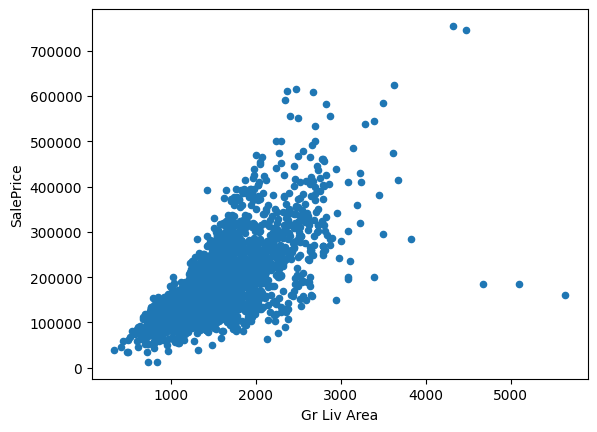

In [2]:
df_ames.plot.scatter(x="Gr Liv Area", y="SalePrice")

We see that square footage (of the dwelling) and the sale price have a positive relationship. That is, the greater the living area, the higher the sale price.

## Summary Statistics

To summarize the relationship between two quantitative variables $X$ and $Y$, we can report the _covariance_ between them, defined as

$$ \text{Cov}[X, Y] = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)$$

The sign of the covariance will match the direction of the relationship between the two variables. The figures below illustrate why. If two variables are positively related, then the scatterplot might look as follows, with most points in the upper-right and lower-left quadrants (when you divide up the plane into four quadrants based on the means of $X$ and $Y$).

![](https://github.com/ethantrantalis/Data-Science-Intro/blob/master/03-Quantitative-Data/positive_cov.png?raw=1)

Each point on this scatterplot contributes to the sum that makes up the covariance. Any point in the upper-right quadrant (where $x$ and $y$ are both greater than their respective means) has a positive contribution, since the product of two positive numbers is positive. A point in the lower-left quadrant (where $x$ and $y$ are both less than their respective means) also has a positive contribution, since the product of two negative numbers is also positive. Therefore, on the whole, the covariance will be positive for two variables with a positive relationship.

We can also consider two variables with a negative relationship. A scatterplot of two negatively-related variables might look as follows, with most points in the upper-left and lower-right quadrants. Points in both of these quadrants will have a negative contribution towards the covariance, since the product of a positive and a negative number is negative.

![](https://github.com/ethantrantalis/Data-Science-Intro/blob/master/03-Quantitative-Data/negative_cov.png?raw=1)

What does it mean for the covariance to be _zero_? It does not necessarily mean that there is _no_ relationship at all between the two variables; it just means that the two variables do not move in a consistent direction. For example, the two variables below have _zero_ covariance because the negative contributions from the upper-left and lower-right quadrants perfectly cancel out the positive contributions from the upper-right and lower-left quadrants. However, it would be inaccurate to say that $X$ and $Y$ have _no_ relationship; they have a strong relationship, but it just is not consistently in one direction.

![](https://github.com/ethantrantalis/Data-Science-Intro/blob/master/03-Quantitative-Data/zero_cov.png?raw=1)

To calculate the covariance between two quantitative variables, we use the `.cov()` method in `pandas`. This method is attached to one `Series` and takes another `Series` of the same length as input. It returns the covariance between the two `Series`.

In [3]:
df_ames["Gr Liv Area"].cov(df_ames["SalePrice"])

28542199.568276513

The covariance between the two variables is positive, as should be apparent from the scatterplot above. Larger houses sell for higher prices.

One criticism of the covariance is that the value itself is difficult to interpret, and covariances are not comparable across different variables.  As we did with the $\chi^2$ distance in the previous section, we can normalize the covariance. This _normalized covariance_ is called the **correlation** and is symbolized $r$:

$$ r = \frac{\text{Cov}[X, Y]}{\text{SD}[X] \text{SD}[Y]} $$

The correlation has all of the important properties of covariance:

- A positive correlation indicates a positive relationship between the variables. As one increases, so does the other.
- A negative correlation indicates a negative relationship between the variables. As one increases, the other tends to decrease.
- A zero correlation means that the two variables do not move in a consistent direction, but does not necessarily mean that they have _no_ relationship.

But the correlation is also guaranteed to be between $-1$ and $1$, so it can be compared across data sets.

What does a maximal correlation of $\pm 1$ mean? It means that the data fall perfectly along a line.

![](https://github.com/ethantrantalis/Data-Science-Intro/blob/master/03-Quantitative-Data/corr_1.png?raw=1)

Correlation is calculated in `pandas` in much the same way that covariance is, using the `.corr()` method:

In [5]:
df_ames["Gr Liv Area"].corr(df_ames["SalePrice"])

0.7067799209766279

Like the covariance, the correlation $r$ is positive, but is normalized to be between $-1$ and $+1$. $r=+1$ would mean that all of the points on the scatterplot fell perfectly along a line (with positive slope). Although the points in the scatterplot do not all fall perfectly on a line, they do seem to hover around an underlying line. This explains why the correlation is close to, but not equal to, $1$.

# Exercises

1\. What is the correlation between any variable and itself? Check your answer with any (quantitative) variable from the Ames housing data set.

2\. What is the covariance between any variable and itself? (Hint: It's one of the summary statistics we studied in Chapter 1.)

In [10]:
df_ames["Lot Frontage"].corr(df_ames["Lot Frontage"])

# This is to be expected since a correlation of 1 means that the variables follow each other perfectly. Since these
# are the same variable they would follow each other perectly.

1.0

Exercises 3-4 deal with the Tips data set (`https://dlsun.github.io/pods/data/tips.csv`).

3\. Make a scatterplot showing the relationship between the tip and the total bill.

<Axes: xlabel='tip', ylabel='total_bill'>

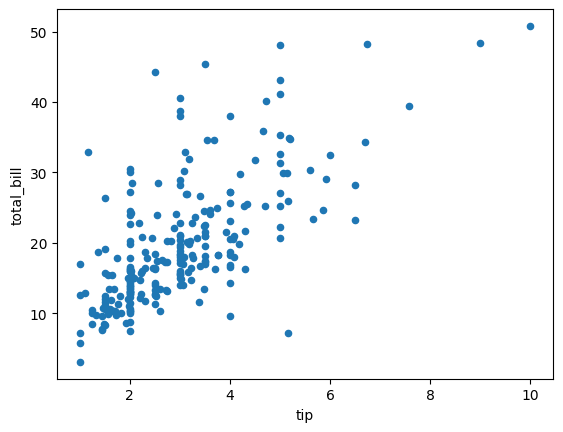

In [14]:
df_tips = pd.read_csv("/content/tips(1).csv")
df_tips.plot.scatter(x="tip", y="total_bill")

4\. Which pair of variables in this data set have the highest correlation with each other?

In [18]:
df_tips["size"].corr(df_tips["total_bill"]) # 0.5983151309049022

df_tips["total_bill"].corr(df_tips["tip"]) # 0.6757341092113641 <--

df_tips["size"].corr(df_tips["tip"]) # 0.48929877523035775

0.48929877523035775

5\. To build your intuition about correlation, play this [correlation guessing game](http://guessthecorrelation.com/). There is even a two-player mode that allows you to play against a friend in the class.

In [ ]:
# best streak was three